In this notebook, we visualize some sweep results.
We create boxplots for each noise levels and both models to see:
- The performance of both models
- How performance relate to the number of iterations/layers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wandb

import numpy as np
import seaborn as sns

import sys
BASE_PATH = globals()['_dh'][0].parent.absolute()
sys.path.insert(1, str(BASE_PATH))

from src.utils.wandb_analysis import get_sweep_info, get_clean_sweep_runs
wandb.login()

/Users/sizhuang/Desktop/GitHubRepos/IterativeMethods/iterENV/lib/python3.8/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
/Users/sizhuang/Desktop/GitHubRepos/IterativeMethods/iterENV/lib/python3.8/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
wandb: Currently logged in as: sizhuang. Use `wandb login --relogin` to force relogin


True

In [ ]:
def get_boxplot(sweep_id, noise_level):
    df = get_clean_sweep_runs(sweep_id, model_name=None)
    plt.figure()
    bp = sns.boxplot(x='num_iter_layers',
            y="test_accuracy",
            data=df,
            width=0.5,
            flierprops={"marker": "x"},
            medianprops={"color": "red"},
            color="royalblue"
            )
    bp.set(title="noise level: "+str(noise_level), xlabel='Number of iterations/layers', ylabel='Test accuracy')
    sns.move_legend(bp, loc=(1.02, 1))

In [2]:
usual_sweeps = [
"yb9nj1j5", # noise 0, 100 data
"s29ovdjm", # noise 1, 100 data
"io2roeki", # noise 2, 100 data
"ni1y0i2n", # noise 3, 100 data
"c1v5292z", # noise 4, 100 data
"f3kaci4y", # noise 5, 100 data
"91g554g5", # noise 6, 100 data
"zgyfs4la"  # noise 7, 100 data
]

iterative_sweeps = [
"8b5samb8", # noise 0, 100 data
"4013a4eg", # noise 1, 100 data
"hewvhl9l", # noise 1, 200 data
"y4prhi94", # noise 2, 100 data
"yypt1ahv", # noise 2, 200 data
"el1u1dr4", # noise 3, 100 data
"n21z6vhb", # noise 3, 200 data
"4mlrggda", # noise 4, 100 data
"f5sg4zi7", # noise 4, 200 data
"x6nu6eip", # noise 4, 200 data
"qspwm421", # noise 5, 100 data
"2e6jew01", # noise 5, 200 data
"36x0z5q4", # noise 6, 100 data
"eyb0xbt1", # noise 6, 200 data
"823rcbn7", # noise 7, 100 data
"7etnd43p"  # noise 7, 200 data
]

variant_sweeps = [
"nhj93ccd", # noise 0, 100 data
"z35d1w5v", # noise 1, 100 data
"3qpjo1d3", # noise 2, 100 data
"uhno0u30", # noise 3, 100 data
"nm41at8u", # noise 4, 100 data
"4fq47kn0", # noise 5, 100 data
"9w9xq0qg", # noise 6, 100 data
"kj2gmoex"  # noise 7, 100 data
]

# the following list contains new sweeps that fix all hyperparameters except number of iterations/layers to 
iterative_sweeps_new = [
    "npqagdoe",
    "fbn61ca2",
    "9atukh0o",
    "3i2obz9l",
    "ic0hskuj",
    "g1jho213",
    "nnefje8j",
    "k8g0jcqg",
    "eypvgt5a",
    "rpdye1qv",
    "dpqr6d03",
    "kvx76htx",
    "sc74qok8",
    "98xetv9g",
    "hkdp23qh",
    "pr8zccth",
    "t5fm602l"
]

usual_sweeps_new = [
    "ajdn1ku3",
    "wpwawhmp",
    "2m3mssse",
    "3p8bp8cp",
    "fhyx3bbq",
    "mba8gfcz",
    "nr0x2ymu",
    "fue8e9t8",
    "ztmtmko3"
]

variant_sweeps_new = [
    "nlx35xhp",
    "tneqq6w2",
    "dxka4tsg",
    "9c28vxsu",
    "gvoklm8v",
    "ie77h8x0",
    "z5dtpgqd",
    "1yx7lryw",
    "p5z39rcd"
]
et_sweeps = [
    "0raelo43",
    "4rg0uxpp",
    "94xcgi8e",
    "erzrkzbk",
    "fee9p58u",
    "hui3yyj4",
    "kocjz30g",
    "l7vskl73"
]
la_sweeps = [
    "8riai7xz",
    "9on84a2k",
    "asuy8soi",
    "jwfs6hs6",
    "lps302bu",
    "n5x4650c",
    "rae47h1a",
    "tc64owjo"
]

et_sweeps_new = [
    "0jtwamgf",
    "df8kwrcn",
    "dvdreyh1",
    "hn1uti5e",
    "rw1njstw",
    "w9m9pd9w",
    "z9rcd42e",
    "zvbdj6cq"
]
la_sweeps_new = [
    "25djetlf",
    "ivdib8fh",
    "k8u5qveo",
    "ls4ffjhb",
    "ovgs93gz",
    "wg2tfjx0",
    "xjjclkjl",
    "zandqytf"
]

#fs below means fixed seed
usual_sweeps_fs = [
    "wpgqndil",
    "snixszrp",
    "sg10twya",
    "fixk72p9",
    "chw33qjj",
    "85ww4r7f",
    "6gsnhfm2",
    "xyla47oz"
]
iterative_sweeps_fs = [
    "r8a00hlx",
    "hdbezpa8",
    "eed7mz8v",
    "3zpkny2k",
    "09xsc4jg",
    "5yj0hoq0",
    "tb7en5xo",
    "deq4nstg"
]
variant_sweeps_fs = [
    "z76p5hhw",
    "wrykoehh",
    "rdakindz",
    "katu4o1y",
    "jl8sb2r8",
    "d5h89j4k",
    "9nwot4q3",
    "6w2oje4q"
]
et_sweeps_fs = [
    "iko74hch",
    "7xo3sn45",
    "42bru6yl",
    "dhcgqwh9",
    "x2uurnl1",
    "r0qjjsad",
    "46hm8exn",
    "tv6fdghw"
]
la_sweeps_fs = [
    "z5u0dnci",
    "ux3ih27j",
    "tapto3iy",
    "jxpq7oip",
    "4iepihxt",
    "xbla22nc",
    "7ndaao6o",
    "yh51xjxf"
]
    


In [ ]:
get_sweep_info(et_sweeps_fs).sort_values(by=["noise_percent"])

In [ ]:
get_sweep_info(la_sweeps_fs).sort_values(by=["noise_percent"])

# Learned smoothing factors

In [8]:
la_df_list = []
for sweep_id in la_sweeps_fs:
    la_df_list.append(get_clean_sweep_runs(sweep_id=sweep_id, model_name='l_iGCN'))
la_df = pd.concat(la_df_list)

In [37]:
noise_level = 0.1
df = la_df[la_df["noise_percent"] == noise_level]
num_iterations = 4
dff = df[df["num_iter_layers"] == num_iterations]
dff

,test_accuracy,validation_accuracy,training_accuracy,learned smoothing factors,validation_loss,num_param,epoch,training_loss,test_loss,dataset_name,weight_decay,learning_rate,noise_percent,num_iter_layers,run name,model name
4,0.418,0.388,1.000000,"[0.7526336312294006, 0.7521277666091919, 0.769...",2.402837,47179.0,200.0,0.005698,2.265966,Cora,0.0004,0.004,0.1,4,proud-sweep-394,l_iGCN
14,0.387,0.350,0.992857,"[0.7652835249900818, 0.7726901173591614, 0.776...",3.152623,47179.0,200.0,0.021956,3.037713,Cora,0.0004,0.004,0.1,4,fiery-sweep-384,l_iGCN
17,0.433,0.438,1.000000,"[0.7777319550514221, 0.772638201713562, 0.7853...",2.046443,47179.0,200.0,0.006875,2.027972,Cora,0.0004,0.004,0.1,4,vibrant-sweep-381,l_iGCN
22,0.389,0.396,1.000000,"[0.7820060849189758, 0.8013107180595398, 0.806...",2.181626,47179.0,200.0,0.013868,2.173265,Cora,0.0004,0.004,0.1,4,skilled-sweep-376,l_iGCN
23,0.382,0.366,0.985714,"[0.7827454209327698, 0.7855343818664551, 0.791...",2.464465,47179.0,200.0,0.027504,2.349093,Cora,0.0004,0.004,0.1,4,gentle-sweep-375,l_iGCN
28,0.391,0.424,1.000000,"[0.7557530999183655, 0.7585066556930542, 0.779...",2.456404,47179.0,200.0,0.011336,2.405988,Cora,0.0004,0.004,0.1,4,major-sweep-370,l_iGCN
46,0.413,0.380,1.000000,"[0.7401806116104126, 0.7403988838195801, 0.757...",2.451567,47179.0,200.0,0.010938,2.268419,Cora,0.0004,0.004,0.1,4,divine-sweep-352,l_iGCN
48,0.404,0.400,1.000000,"[0.7941505908966064, 0.8026707172393799, 0.802...",1.977824,47179.0,200.0,0.003406,1.971573,Cora,0.0004,0.004,0.1,4,visionary-sweep-350,l_iGCN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cora,0.0004,0.004,0.1,4,pretty-sweep-347,l_iGCN
56,0.415,0.416,1.000000,"[0.7402008175849915, 0.7455605864524841, 0.755...",2.223203,47179.0,200.0,0.015623,2.168528,Cora,0.0004,0.004,0.1,4,usual-sweep-342,l_iGCN


In [40]:
noise_level = 0.1
df = la_df[la_df["noise_percent"] == noise_level]
num_iterations = 7
dff = df[df["num_iter_layers"] == num_iterations]
drop_index = dff[dff["test_accuracy"].isnull()].index
dff.drop(drop_index, inplace=True)
running_sum = np.full(num_iterations, 0)
len_df = len(dff["learned smoothing factors"])
for item in dff["learned smoothing factors"]:
    running_sum = [a+b for (a,b) in zip(running_sum, item)]

mean = [a/len_df for a in running_sum]
print(mean)

[0.7801643339070407, 0.7746501592072573, 0.7780518938194622, 0.7929718643426895, 0.8101784871383146, 0.8351376517252489, 0.8583303188735788]


/var/folders/t8/17gq4tsx67s3q_h220w7fzmw0000gn/T/ipykernel_82092/3599423696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.drop(drop_index, inplace=True)


# Exp

In [3]:
df_list = []
for sweep_id in usual_sweeps_fs:
    df_list.append(get_clean_sweep_runs(sweep_id=sweep_id, model_name='GCN'))
for sweep_id in iterative_sweeps_fs:
    df_list.append(get_clean_sweep_runs(sweep_id=sweep_id, model_name='iterativeGCN'))
for sweep_id in variant_sweeps_fs:
    df_list.append(get_clean_sweep_runs(sweep_id=sweep_id, model_name='iterativeGCNvariant'))
for sweep_id in et_sweeps_fs:
    df_list.append(get_clean_sweep_runs(sweep_id=sweep_id, model_name='et_iGCN'))
for sweep_id in la_sweeps_fs:
    df_list.append(get_clean_sweep_runs(sweep_id=sweep_id, model_name='l_iGCN'))

df = pd.concat(df_list)

In [4]:
drop_index = df[df["test_accuracy"].isnull()].index
df.drop(drop_index, inplace=True)
df.to_csv("df_full.csv")

In [5]:
df = pd.read_csv("df_full.csv")

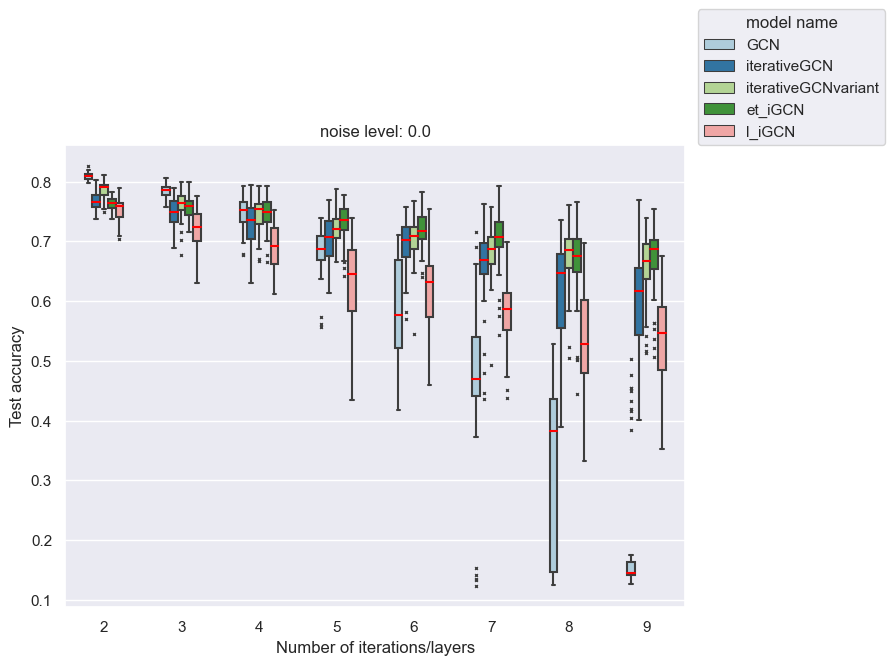

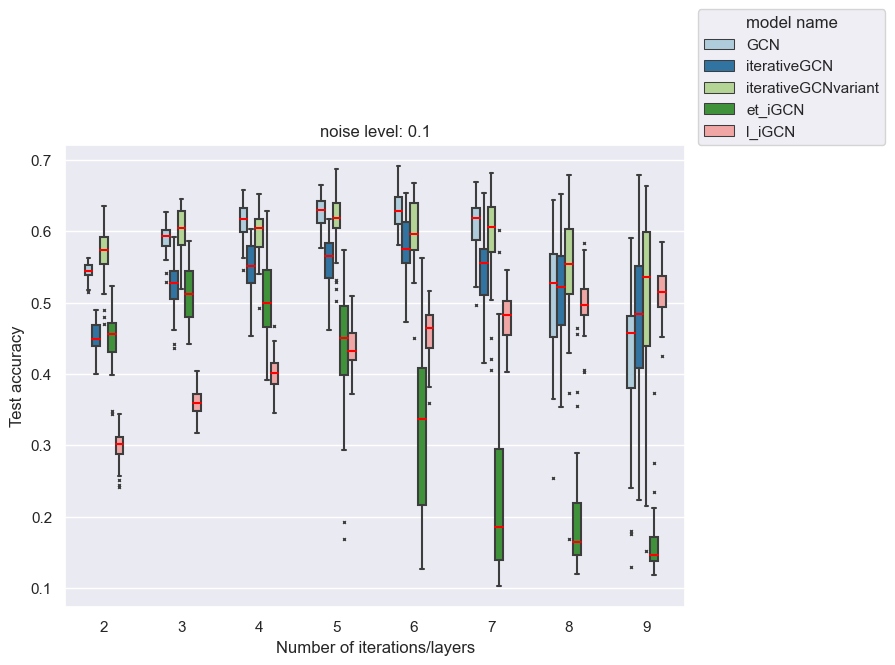

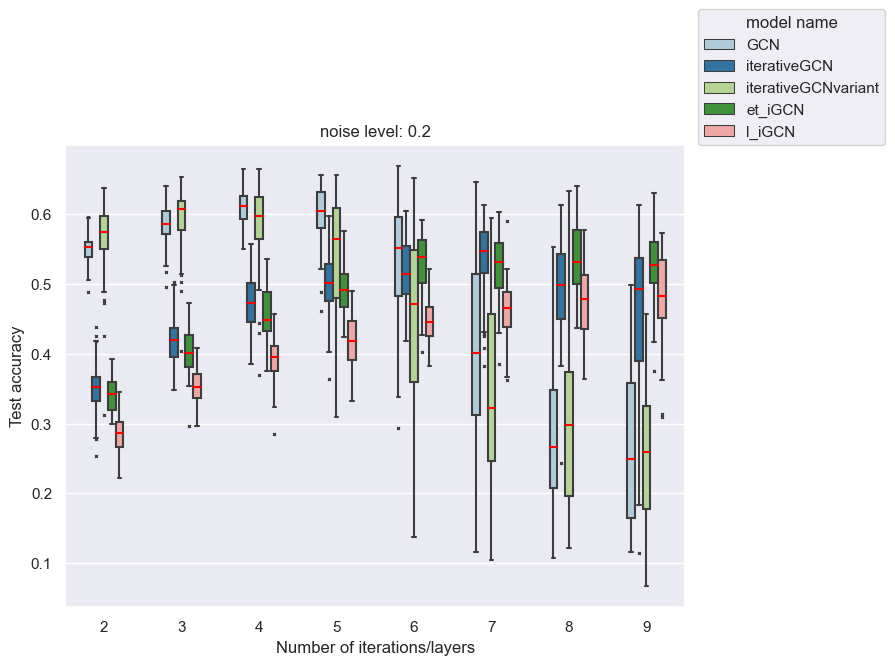

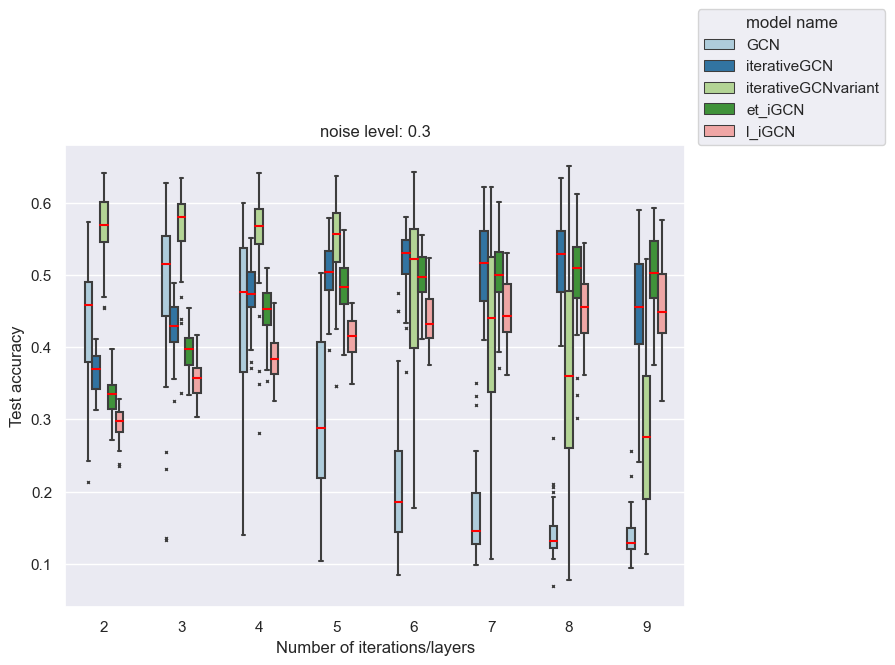

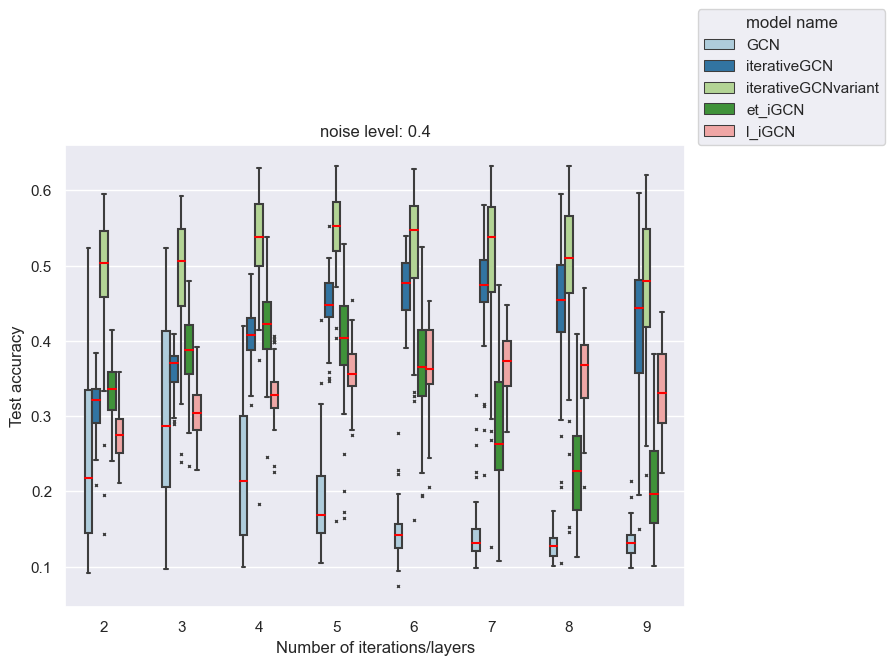

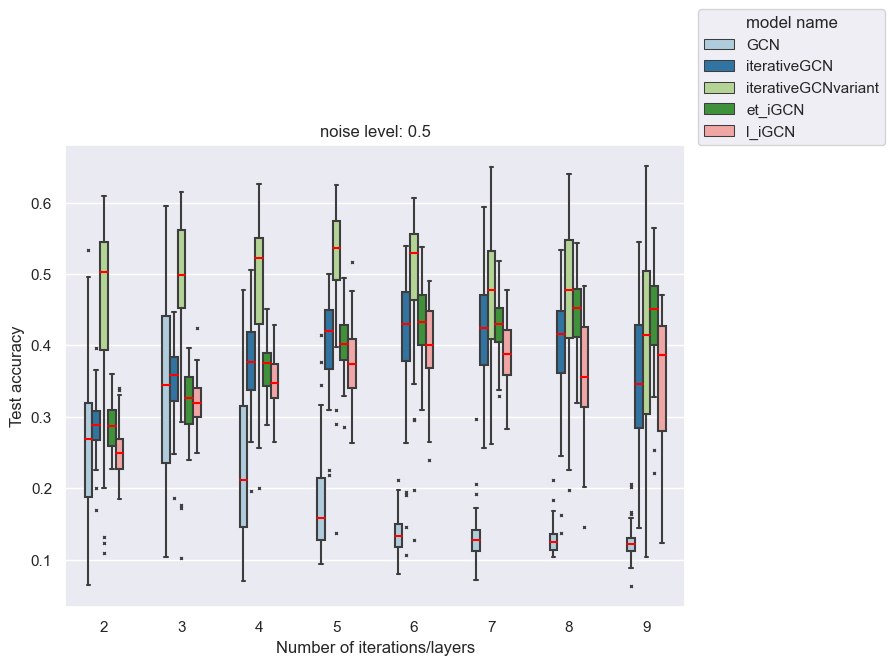

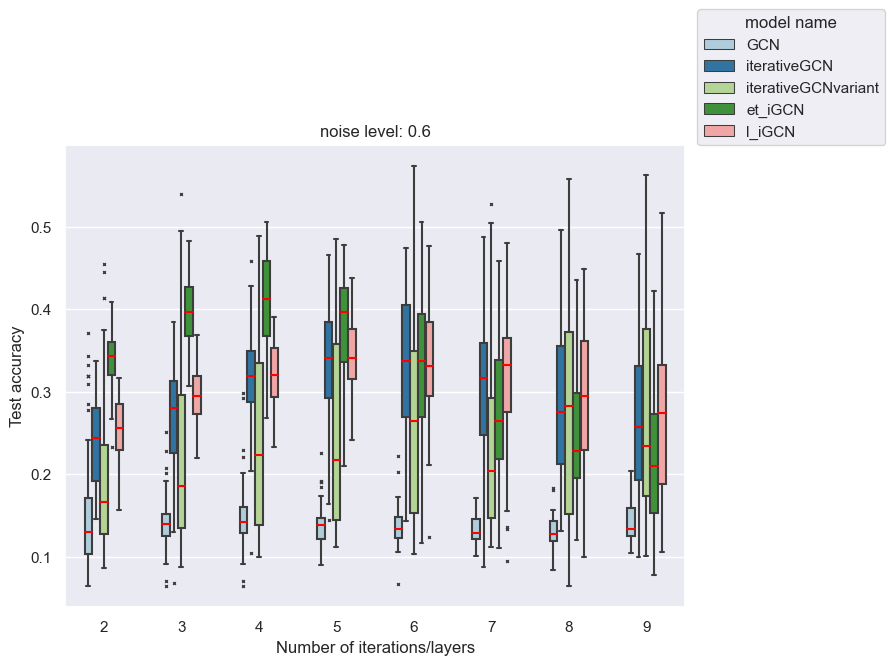

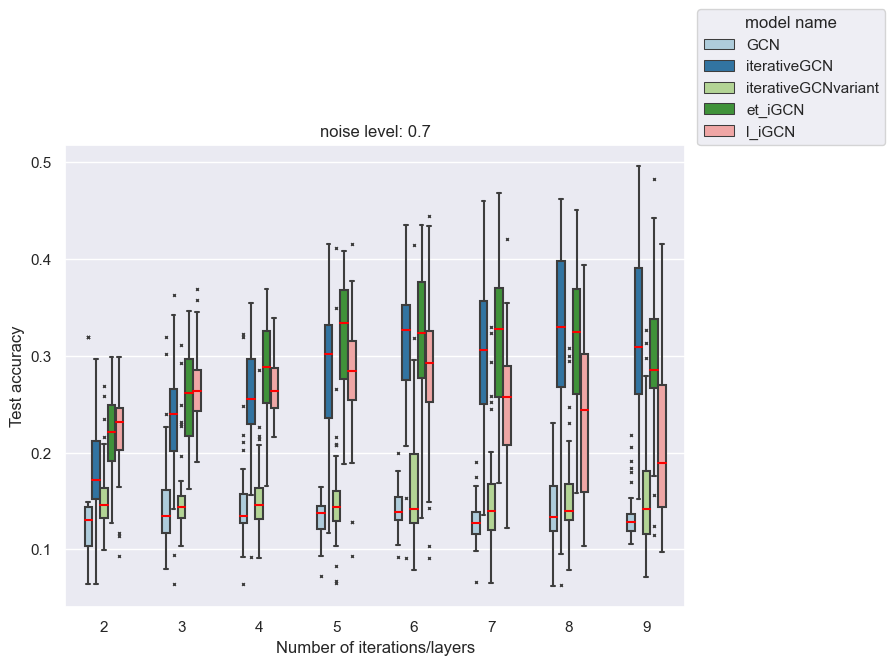

In [7]:
for noise_level in np.sort(pd.unique(df["noise_percent"])):
    dfn = df[df["noise_percent"] == noise_level]
    fig = plt.figure()
    sns.set(style="darkgrid")
    sns.set(rc={'figure.figsize':(8,6)})
    
    bp = sns.boxplot(x='num_iter_layers',
            y="test_accuracy",
            data=dfn,
            width=0.5,
            hue="model name",
            flierprops={"marker": "x",
                        "markersize": 2},
            medianprops={"color": "red"},
            palette="Paired"
            )
    bp.set(title="noise level: "+str(noise_level), 
           xlabel='Number of iterations/layers', 
           ylabel='Test accuracy')
    sns.move_legend(bp, loc=(1.02, 1))
    name = "noise_level_"+str(noise_level)+".png"
    
    fig.savefig(name, bbox_inches='tight')
    

In [ ]:
dict_list = []
for noise_level in np.sort(pd.unique(df["noise_percent"])):
    dfn = df[df["noise_percent"] == noise_level]
    for model in pd.unique(dfn["model name"]):
            dfm = dfn[dfn["model name"] == model]
            for iteration in np.sort(pd.unique(dfm["num_iter_layers"])):
                dfi = dfm[dfm["num_iter_layers"] == iteration]
                mean = np.mean(dfi["test_accuracy"])
                median = np.median(dfi["test_accuracy"])
                std = np.std(dfi["test_accuracy"])
                num_runs = dfi["test_accuracy"].count()
                
                eff_iter = 1
                if model == "GCN":
                     eff_iter = iteration 

                num_param = 1433 * 32 + 32 + 32 * 32 * eff_iter + 32 + 32 * 7 + 7
                dic = {
                        "noise percent": noise_level,
                        "model name": model,
                        "number of iterations/layers": iteration,
                        "mean": mean,
                        "median": median,
                        "std": std,
                        "parameters": num_param,
                        "number of runs": num_runs
                }
                dict_list.append(dic)

stats_df = pd.DataFrame(dict_list)     

In [ ]:
pd.set_option('display.max_rows', None)
noise_level = 0.7
stats_df[stats_df["noise percent"] == noise_level].round(3)